# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [115]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [116]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [131]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = requests.get(city_url).json()
        
        #Convert Kelvin to Fahrenheit
        city_max_temp_kelvin = city_weather["main"]["temp_max"]
        city_max_temp_fahrenheit = (city_max_temp_kelvin - 273.15) * 9/5 + 32

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_max_temp_fahrenheit
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | veinticinco de mayo
Processing Record 4 of Set 1 | straseni
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | san antonio de pale
Processing Record 7 of Set 1 | lerwick
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | ostrov
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | remire-montjoly
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | la passe
Processing Record 19 of Set 1 | barcelona
Processing Record 20 of Set 1 | gadzhiyevo
Processing Record 21 of Set 1 | qui nhon
Processing Re

Processing Record 39 of Set 4 | santa ana
Processing Record 40 of Set 4 | six-fours-les-plages
Processing Record 41 of Set 4 | dunedin
Processing Record 42 of Set 4 | nuku'alofa
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | vanimo
Processing Record 45 of Set 4 | akureyri
Processing Record 46 of Set 4 | hermosillo
Processing Record 47 of Set 4 | lihue
Processing Record 48 of Set 4 | hamilton
Processing Record 49 of Set 4 | namibe
Processing Record 0 of Set 5 | kalmunai
Processing Record 1 of Set 5 | aghajari
Processing Record 2 of Set 5 | kirkuk
Processing Record 3 of Set 5 | college
Processing Record 4 of Set 5 | umba
Processing Record 5 of Set 5 | syas'stroy
Processing Record 6 of Set 5 | plettenberg bay
Processing Record 7 of Set 5 | vasind
Processing Record 8 of Set 5 | la sarre
Processing Record 9 of Set 5 | pionerskiy
Processing Record 10 of Set 5 | codrington
Processing Record 11 of Set 5 | saksaul'skiy
City not found. Skipping...
Processing Record 

Processing Record 27 of Set 8 | ixmiquilpan
Processing Record 28 of Set 8 | rayside-balfour
City not found. Skipping...
Processing Record 29 of Set 8 | guerrero negro
Processing Record 30 of Set 8 | kailua-kona
Processing Record 31 of Set 8 | constitucion
Processing Record 32 of Set 8 | guaitarilla
Processing Record 33 of Set 8 | borba
Processing Record 34 of Set 8 | weno
Processing Record 35 of Set 8 | sanguem
Processing Record 36 of Set 8 | vernon
Processing Record 37 of Set 8 | sisimiut
Processing Record 38 of Set 8 | riachao das neves
Processing Record 39 of Set 8 | yarmouth
Processing Record 40 of Set 8 | newport beach
Processing Record 41 of Set 8 | quirinopolis
Processing Record 42 of Set 8 | changyon
Processing Record 43 of Set 8 | yaren
Processing Record 44 of Set 8 | orlovskiy
Processing Record 45 of Set 8 | antofagasta
Processing Record 46 of Set 8 | yakuplu
Processing Record 47 of Set 8 | borkum
Processing Record 48 of Set 8 | awgu
Processing Record 49 of Set 8 | khromtau
P

Processing Record 18 of Set 12 | kayangel
Processing Record 19 of Set 12 | springbok
Processing Record 20 of Set 12 | brigantine
Processing Record 21 of Set 12 | sungailiat
-----------------------------
Data Retrieval Complete      
-----------------------------


In [133]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [134]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,64.076,72,81,4.79,AU,1703633236
1,ushuaia,-54.8000,-68.3000,51.458,46,0,14.92,AR,1703633286
2,veinticinco de mayo,-35.4323,-60.1727,70.952,55,0,2.81,AR,1703633289
3,straseni,47.1414,28.6103,44.420,89,23,4.26,MD,1703633291
4,katsuura,35.1333,140.3000,48.686,65,79,4.31,JP,1703633291


In [135]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [136]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,64.076,72,81,4.79,AU,1703633236
1,ushuaia,-54.8000,-68.3000,51.458,46,0,14.92,AR,1703633286
2,veinticinco de mayo,-35.4323,-60.1727,70.952,55,0,2.81,AR,1703633289
3,straseni,47.1414,28.6103,44.420,89,23,4.26,MD,1703633291
4,katsuura,35.1333,140.3000,48.686,65,79,4.31,JP,1703633291


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

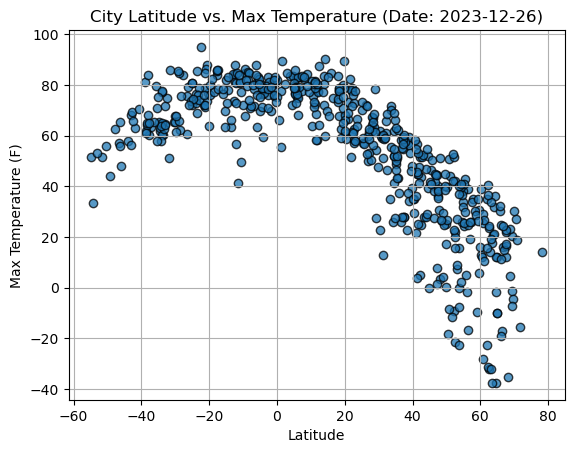

In [137]:
#Format
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit="s")
city_data_df["Max Temp (F)"] = (city_data_df["Max Temp"] - 32) * 5/9

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date: {})".format(city_data_df["Date"].dt.strftime('%Y-%m-%d').iloc[0]))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

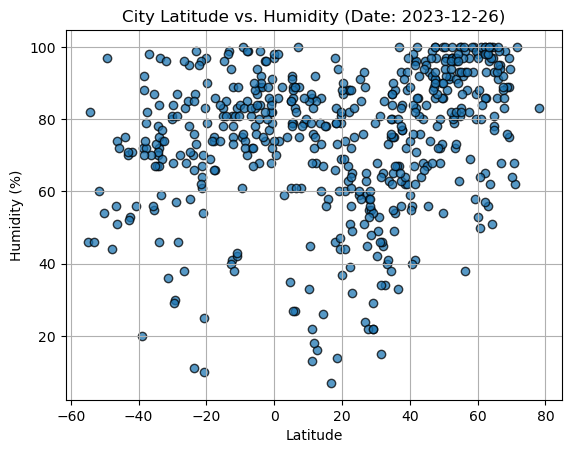

In [138]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date: {})".format(city_data_df["Date"].dt.strftime('%Y-%m-%d').iloc[0]))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

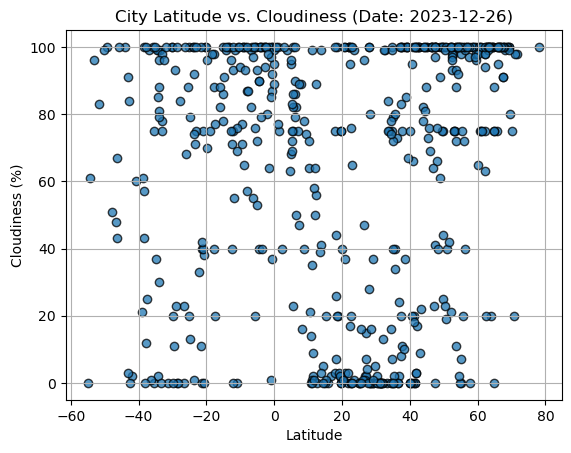

In [139]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date: {})".format(city_data_df["Date"].dt.strftime('%Y-%m-%d').iloc[0]))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

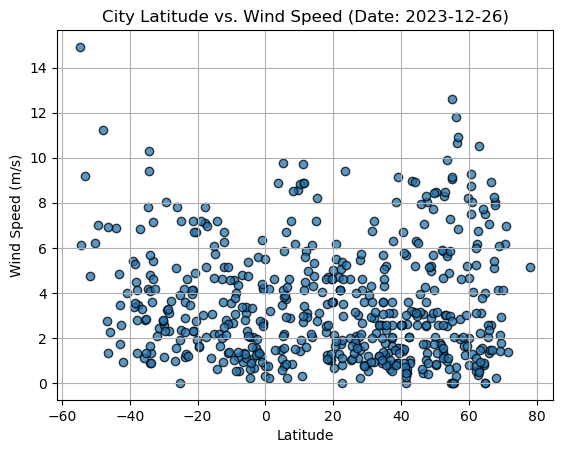

In [140]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date: {})".format(city_data_df["Date"].dt.strftime('%Y-%m-%d').iloc[0]))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [141]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, output_file):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
   
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Scatter plot
    plt.scatter(x_values, y_values, alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
   
    # Annotate the linear regression equation on the plot
    plt.annotate(line_eq,(0.15, 0.05), xycoords='axes fraction', fontsize=15, color="red") 
        
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
    print(f"The r-value is: {r_value}")
      
    plt.savefig(output_file)
        
    # Show plot
    plt.show()

In [142]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (F)
City_ID,,,,,,,,,,
3,straseni,47.1414,28.6103,44.420,89,23,4.26,MD,2023-12-26 23:28:11,6.90
4,katsuura,35.1333,140.3000,48.686,65,79,4.31,JP,2023-12-26 23:28:11,9.27
6,lerwick,60.1545,-1.1494,38.894,53,65,4.67,GB,2023-12-26 23:28:12,3.83
8,isafjordur,66.0755,-23.1240,24.818,91,100,1.32,IS,2023-12-26 23:28:13,-3.99
11,ostrov,57.3439,28.3537,25.736,97,97,1.96,RU,2023-12-26 23:28:16,-3.48


In [143]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (F)
City_ID,,,,,,,,,,
0,margaret river,-33.9500,115.0667,64.076,72,81,4.79,AU,2023-12-26 23:27:16,17.82
1,ushuaia,-54.8000,-68.3000,51.458,46,0,14.92,AR,2023-12-26 23:28:06,10.81
2,veinticinco de mayo,-35.4323,-60.1727,70.952,55,0,2.81,AR,2023-12-26 23:28:09,21.64
5,san antonio de pale,-1.4014,5.6325,80.924,77,64,1.19,GQ,2023-12-26 23:28:12,27.18
7,grytviken,-54.2811,-36.5092,33.206,82,61,6.12,GS,2023-12-26 23:28:13,0.67


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8362611447055892


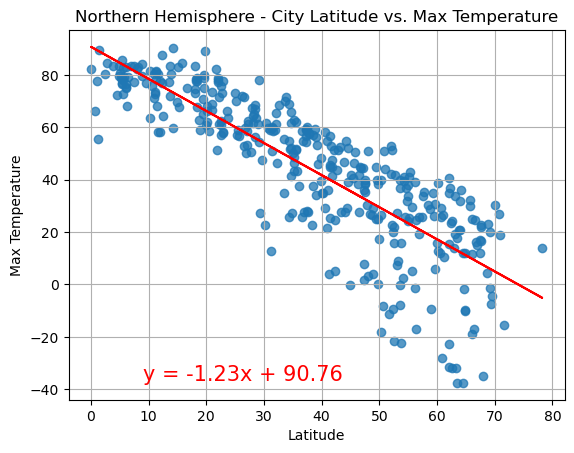

In [144]:
# Linear regression on Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temperature",
    "Northern Hemisphere - City Latitude vs. Max Temperature",
    "northern_latitude_vs_temperature_regression.png"
)


The r-value is: 0.5769993136423098


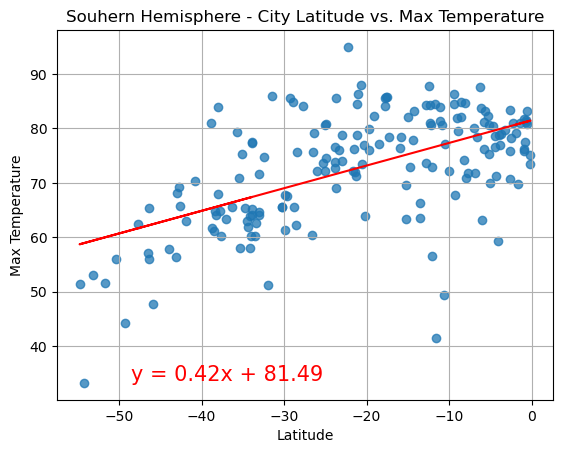

In [145]:
# Linear regression on Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temperature",
    "Souhern Hemisphere - City Latitude vs. Max Temperature",
    "southern_latitude_vs_temperature_regression.png"
)

**Discussion about the linear relationship:** The correlation of both Hemispheres indicates the weather increases in temperature as one moves toward 0 latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3802363175527994


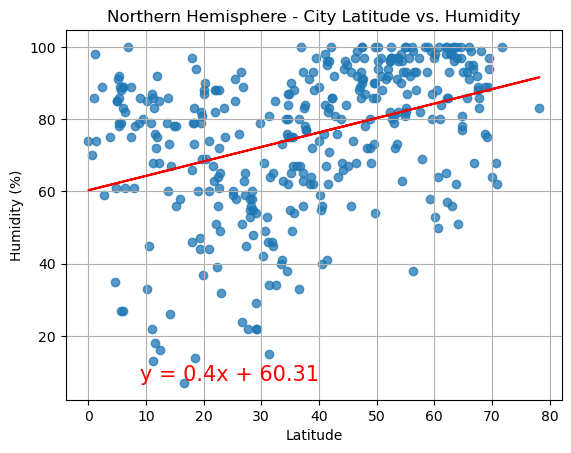

In [146]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Northern Hemisphere - City Latitude vs. Humidity",
    "northern_latitude_vs_Humidity_regression.png"
)

The r-value is: 0.33933381224962483


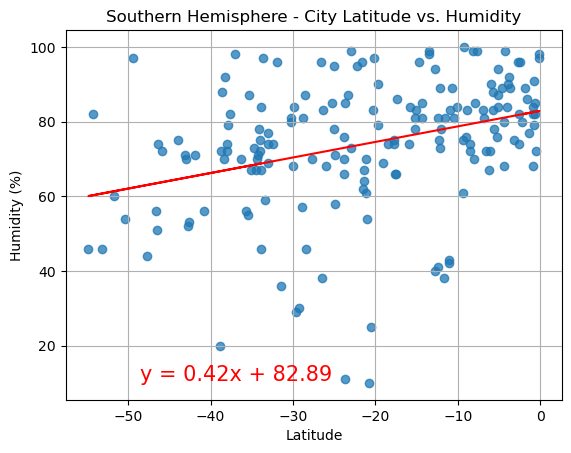

In [147]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Southern Hemisphere - City Latitude vs. Humidity",
    "southern_latitude_vs_Humidity_regression.png"
)

**Discussion about the linear relationship:** The correlation of both Hemispheres indicates latitude does not have a strong impact on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.35476315594650826


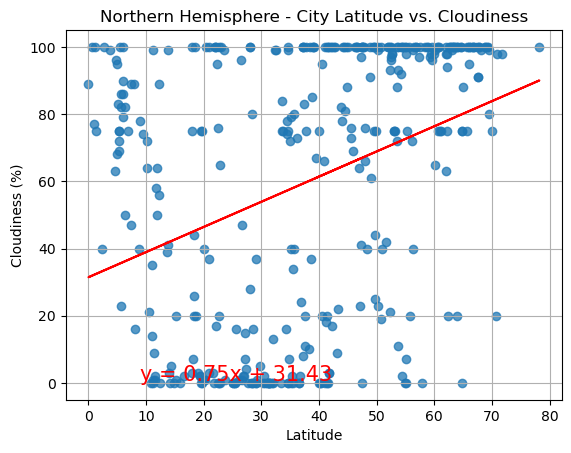

In [148]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Northern Hemisphere - City Latitude vs. Cloudiness",
    "northern_latitude_vs_cloudiness_regression.png"
)

The r-value is: 0.27289634752278596


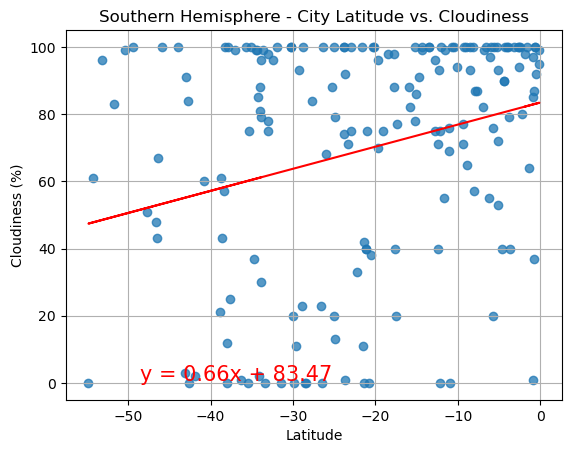

In [149]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Southern Hemisphere - City Latitude vs. Cloudiness",
    "Southern_latitude_vs_cloudiness_regression.png"
)

**Discussion about the linear relationship:** The correlation of both Hemispheres indicates latitude does not have a strong impact on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.050863933142230186


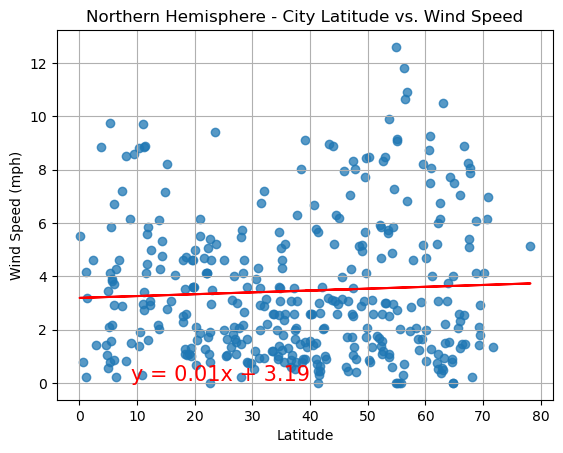

In [150]:
# Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (mph)",
    "Northern Hemisphere - City Latitude vs. Wind Speed",
    "northern_latitude_vs_wind_speed_regression.png"
)

The r-value is: -0.3610557517635518


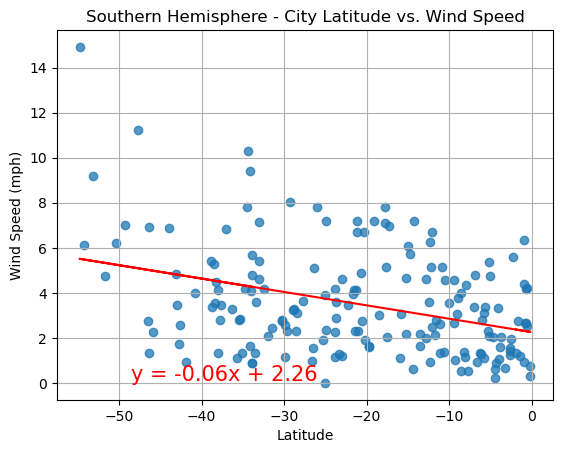

In [151]:
# Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (mph)",
    "Southern Hemisphere - City Latitude vs. Wind Speed",
    "Southern_latitude_vs_wind_speed_regression.png"
)

**Discussion about the linear relationship:** The correlation of both Hemispheres indicates latitude does not have a strong impact on wind speed.